# Binomials, Factorials, and other Combinatorial Things

In this appendix we will play with permutations in Python, take care with combinations, and give you facts about factorials.  We'll try not to step on material from existing courses, and instead play with facts that are fun but not covered elsewhere. Mostly we will stick to native Python and its arbitrary precision _integer_ arithmetic.

In [1]:
n = 5
fact = 1
for j in range(1,n+1):
    fact = j*fact
print(n,'! = ', fact)

5 ! =  120


Factorials are encountered in combinatorial (counting) problems.  If you have five different shaped blocks, how many different towers can you make with them, assuming that each can be stacked on top of any other?  Well, you have five choices for the bottom block; once you have chosen the bottom block you have four to choose for the next level; then three to choose for the next; then two for the next; then the last block left you put on top, you have no choices left.  This gives 5 times 4 times 3 times 2 times 1 different possible towers; this is 5! or 120, as computed above.

Yawn.

Well, factorials are so useful that we should spend a _little_ time with them before going on to more fun things.  One neat/annoying feature is how fast they grow.

In [2]:
for n in range(15):
    fact = 1
    for j in range(1,n+1):
        fact = j*fact
    print(n, '! = ', fact)

0 ! =  1
1 ! =  1
2 ! =  2
3 ! =  6
4 ! =  24
5 ! =  120
6 ! =  720
7 ! =  5040
8 ! =  40320
9 ! =  362880
10 ! =  3628800
11 ! =  39916800
12 ! =  479001600
13 ! =  6227020800
14 ! =  87178291200


The programmers among you might be screaming at us for the inefficiency in that double loop up above.  We can get the same table with just a single loop, and the cost will be significantly less.  This is worth exploring, as a fundamental lesson of programming: if you can avoid nesting loops, do so!  First let's time that one.

In [3]:
import time

strt = time.time()
for n in range(15):
    fact = 1
    for j in range(1,n+1):
        fact = j*fact
    print(n, '! = ', fact)

fin = time.time() - strt

print('total time taken ', fin, 'seconds')

0 ! =  1
1 ! =  1
2 ! =  2
3 ! =  6
4 ! =  24
5 ! =  120
6 ! =  720
7 ! =  5040
8 ! =  40320
9 ! =  362880
10 ! =  3628800
11 ! =  39916800
12 ! =  479001600
13 ! =  6227020800
14 ! =  87178291200
total time taken  0.0019941329956054688 seconds


Eh, not so much time at all, really.  But let's probe a _bit_ harder, and try to look at how the needed time _grows_ with n.

Note added after editing: we had nmax=1500 in the loop below, but this was a disaster; not for Jupyter notebooks, which happily put the 2.8 million characters of the result in a neat box, but for Jupyter Book when we tried to convert to PDF.  This tried to make a couple of thousand pages of nothing but numbers.  Um, no.  Let's not do that. 

It is a bit ironic because we have frequently told students not to print huge tables of numbers.  Oops, shuffle feet.

In [4]:
from matplotlib import pyplot as plt

0 ! =  1
1 ! =  1
2 ! =  2
3 ! =  6
4 ! =  24
5 ! =  120
6 ! =  720
7 ! =  5040
8 ! =  40320
9 ! =  362880
10 ! =  3628800
11 ! =  39916800
12 ! =  479001600
13 ! =  6227020800
14 ! =  87178291200


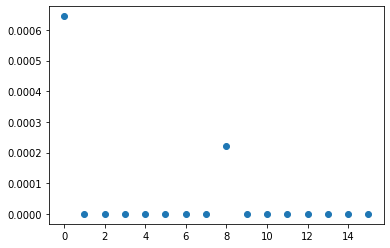

In [5]:
import numpy as np
nmax = 15  # Really, don't try 1500 here if you want to make a PDF.
individual_times = np.zeros(nmax+1)
for n in range(nmax):
    strt = time.time()
    fact = 1
    for j in range(1,n+1):
        fact = j*fact
    print(n, '! = ', fact)
    individual_times[n] = time.time()-strt

plt.scatter([range(nmax+1)], individual_times)
plt.show()

Well, that didn't turn out the way we expected, at all, at all.  The graph of times doesn't show much growth at all; indeed the time taken seems to be largest for some n less than the max.  Blink, blink.  The issue is likely to do with memory management; but we don't really know.  The other thing is that you can just barely discern a _trend_ in the thick line at the bottom; it looks like it's taking more time for larger n, _usually_.  But never very much time.  This problem is just too easy for modern computers (it's running on a Tablet PC, in fact: a vintage 2017 Microsoft Surface Pro).  But something different happens if we change that 1500 above to be a 2000: Python stops, refusing to send so much data to the screen, and prints the message below.  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)


Well, ok then.  1500! is already ludicrously large.  2000! could probably be printed in _plaid_. 

In [6]:
nmax = 15  # No, do not do 1500.
strt = time.time()
fact = 1
for j in range(1,nmax):
    fact = j*fact
    print( j, '! = ', fact)
total_time = time.time()-strt
print('Total time taken is ', total_time, ' seconds ')


1 ! =  1
2 ! =  2
3 ! =  6
4 ! =  24
5 ! =  120
6 ! =  720
7 ! =  5040
8 ! =  40320
9 ! =  362880
10 ! =  3628800
11 ! =  39916800
12 ! =  479001600
13 ! =  6227020800
14 ! =  87178291200
Total time taken is  0.0019958019256591797  seconds 


Crazy big numbers.  And Python is pretty fast with them.  Fine.  This raises a question: how big _are_ those numbers, and can we predict their behaviour?  Yes, after a fashion, and pretty accurately.  Most reference books will tell you that there is something called _Stirling's Formula_ that makes factorials more intelligible:

$$
n! \simeq \sqrt{2\pi n} n^n e^{-n}
$$

Well, ok.  Where does that come from?  How do we know it's true?  What does the squiggly equals sign mean?  Well, it means "is approximately equal to " which is clear enough in intent.  How approximate, though?

In [7]:
n = 100
fact = 1
for j in range(1, n+1):
    fact = j*fact

print(n, '! = ', fact, 'which is approximately ', 1.0*fact)

stirl = np.sqrt(2*np.pi* n) * n**n * np.exp(-n)
print('Stirling\'s approximation gives ', stirl)

100 ! =  93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000 which is approximately  9.332621544394415e+157
Stirling's approximation gives  9.324847625269344e+157


It's fun to know a fact about Stirling's formula that most people don't know:  That formula above is actually due to DeMoivre, and it is _less_ accurate than Stirling's original formula (which Stirling found first, before DeMoivre found the other)! Here is Stirling's original, more accurate, formula:

$$
n! \simeq \sqrt{2\pi} \left(n+\frac12\right)^{(n+1/2)}e^{-(n+1/2)}
$$


In [8]:
original_Stirling = np.sqrt(2*np.pi)*(n+0.5)**(n+0.5)*np.exp(-n-0.5)
print('Stirling\'s Original approximation gives ', original_Stirling)

Stirling's Original approximation gives  9.336491570312413e+157


The true value is between those two estimates: DeMoivre's formula (which is called Stirling's formula) gives a slight lower bound on $n!$, while Stirling's original formula (which, no lie, is beginning to be called De Moivre's formula!) gives a slight upper bound, which is about twice as accurate.  We can take a weighted average of the two and get an even better estimate:

In [9]:
better = (stirl + 2*original_Stirling)/3
print('A better estimate is ', better)

A better estimate is  9.332610255298058e+157


For n=100, we see that it gets $9.33261025..$ whereas the true value is $9.332621544..$ (both times $10^{157}$), so (mentally estimating, think think think) a relative error of roughly $10^{-6}$ whereas each of DeMoivre's and Stirling's formula is accurate only to about $10^{-3}$, in a relative sense.

In [10]:
reference_value = 1.0*fact
stirl_rel_error = (stirl - reference_value)/reference_value
orig_rel_error = (original_Stirling - reference_value)/reference_value
better_error = (better - reference_value)/reference_value
print('Stirling relative error = ', stirl_rel_error)
print('Original Stirling relative error = ', orig_rel_error)
print('Error in the weighted average = ', better_error)

Stirling relative error =  -0.0008329834321569032
Original Stirling relative error =  0.0004146772586447313
Error in the weighted average =  -1.2096382890597644e-06


Now let's look at binomial coefficients " n choose k ".  It turns out that there are several implementations in Python already.

In [11]:
import math as mth
# factorial is "factorial"
# binomial coefficient is "comb" (short for "combinations" we suppose)
print(mth.factorial(7))
print(mth.comb(0,0))
print(mth.comb(1,0), mth.comb(1,1))
print(mth.comb(2,0), mth.comb(2,1), mth.comb(2,2))
print(mth.comb(3,0), mth.comb(3,1), mth.comb(3,2), mth.comb(3,3))
big = mth.comb(200, 100)
print(big)

5040
1
1 1
1 2 1
1 3 3 1
90548514656103281165404177077484163874504589675413336841320


## Exercises
1. If we average Stirling's original formula (weight 2/3) with the formula popularly known as Stirling's formula (weight 1/3) we saw that we got more accurate answers.  Find weights of the form $2/3 + u_1/z + u_2/z^2$ and $1/3 + v_1/z + v_/z^2$ (that should add up to 1) which are even more accurate, for larger z. Is the formula simpler if you use powers of $(z+1/2)$ instead?
2. How quickly does math.comb(2n,n) grow as n grows? (Answer: like $2^{2n}/\sqrt{\pi n}$; demonstrate that graphically or experimentally)
3. Is there a Python implementation of "permutations" $P^n_k = n!/k!$ ?
4. The venerable book [Problems and Theorems in Analysis](https://link.springer.com/book/10.1007/978-3-642-61983-0) by Pólya and Szegő opens with the following problem: "In how many different ways can you change one dollar?  That is, in how many different ways can you pay 100 cents using five different kinds of coins, cents, nickels, dimes, quarters, and half-dollars (worth 1, 5, 10, 25, and 50 cents respectively)?
5. Updating that problem for Canada today: In how many different ways can you change a one hundred dollar bill?  That is, in how many different ways can you pay 100 dollars using four different kinds of bills (50, 20, 10, and 5) and two types of coin (the 1 dollar coin called a "Loonie" because it has a loon on it, and the 2 dollar coin called a "Toonie" because, well, why not).
6. Another Pólya and Szegő problem: "There are $p$ persons sharing $n$ dollars.  In how many ways can they distribute the money?" 